<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Logistic_Regression_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt   #plot something 
import pandas as pd

In [ ]:
from google.colab import drive  #import gogle drive data

In [ ]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [ ]:
columnName = ['ML','WCMC','admission']
dataset=pd.read_csv("ex2data1.txt",names=columnName)

print(dataset)
print(dataset.shape)

           ML       WCMC  admission
0   34.623660  78.024693          0
1   30.286711  43.894998          0
2   35.847409  72.902198          0
3   60.182599  86.308552          1
4   79.032736  75.344376          1
..        ...        ...        ...
95  83.489163  48.380286          1
96  42.261701  87.103851          1
97  99.315009  68.775409          1
98  55.340018  64.931938          1
99  74.775893  89.529813          1

[100 rows x 3 columns]
(100, 3)


In [ ]:
df = pd.DataFrame(dataset)
dataset.describe()

,ML,WCMC,admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
X_value = dataset.iloc[0:dataset.shape[0],0:1]
X_value

,ML
0,34.623660
1,30.286711
2,35.847409
3,60.182599
4,79.032736
...,...
95,83.489163
96,42.261701
97,99.315009
98,55.340018


In [ ]:
Y_value = dataset.iloc[0:dataset.shape[0],1:2]
Y_value

,WCMC
0,78.024693
1,43.894998
2,72.902198
3,86.308552
4,75.344376
...,...
95,48.380286
96,87.103851
97,68.775409
98,64.931938


In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
pos,neg =(y==1).reshape(100,1),(y==0).reshape(100,1)

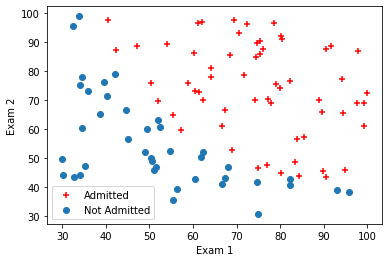

In [ ]:
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],c="r",marker='+')
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],marker='o')
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend(["Admitted","Not Admitted"],loc=0)
plt.show()

In [ ]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [ ]:
sigmoid(0)

0.5

In [ ]:
#feature Normalization
def feature_normalization(x):
    mean = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    x_norm = (x-mean)/std

    return x_norm,mean,std


In [ ]:
def costfunction(theta,x,y):
    m=len(y)
    predictions= []
    error=0
    
    for i in range(m):
        predictions.append(sigmoid(np.dot(x[i],theta)))
        error+=((-y[i])*np.log(predictions[i])-(1-y[i])*np.log(1-predictions[i]))
    
    cost = (1/m)*error

    grad = (1/m) *np.dot(x.transpose(),(predictions-y))
    return cost,grad

In [ ]:
m , n = x.shape[0], x.shape[1]
x, x_mean, x_std = feature_normalization(x)
x= np.append(np.ones((m,1)),x,axis=1)      #axis=1 is direction along column and axis 0 is direction along row
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [ ]:
def gradientDescent(theta,x,y,alpha,iter_num):
    # update theta in each iteration
    # return theta cost values of each iteration
    m=len(y) 
    cost_function_values =[]
    
    for i in range(iter_num):
        cost, grad = costfunction(theta,x,y)
        theta = theta - (alpha * grad)
        cost_function_values.append(cost)
        if(i%50==0):
            plt.scatter(x[pos[:,0],1],x[pos[:,0],2],c="r",marker="+",label="Admitted")
            plt.scatter(x[neg[:,0],1],x[neg[:,0],2],c="b",marker="x",label="Not admitted")
            x_value= np.array([np.min(x[:,1]),np.max(x[:,1])])
            y_value=-(theta[0] +theta[1]*x_value)/theta[2]
            plt.plot(x_value,y_value, "g")
            plt.xlabel("Exam 1 score")
            plt.ylabel("Exam 2 score")
            plt.show()
            
    return theta,cost_function_values

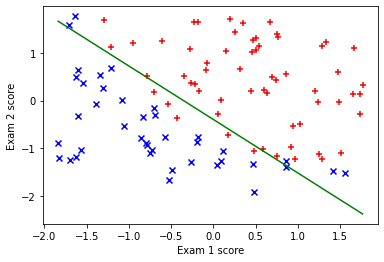

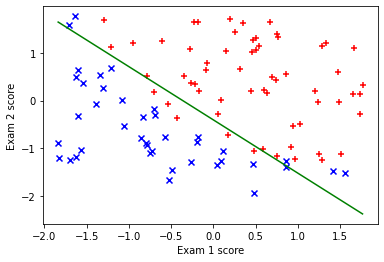

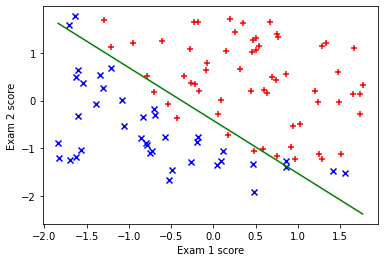

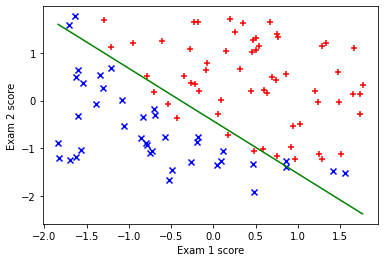

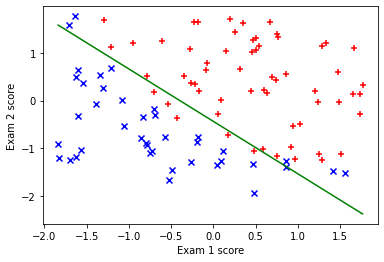

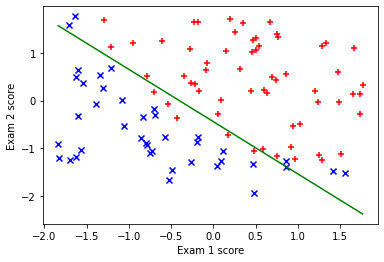

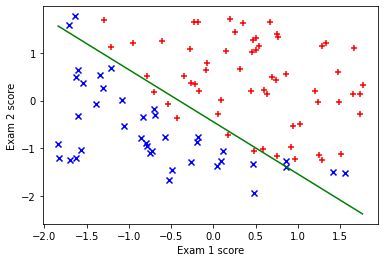

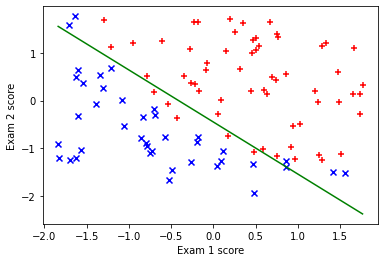

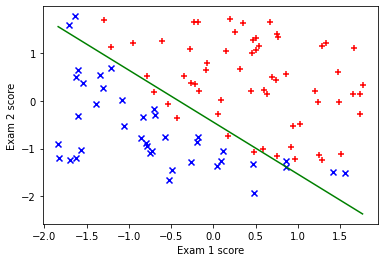

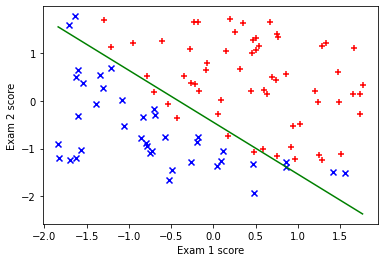

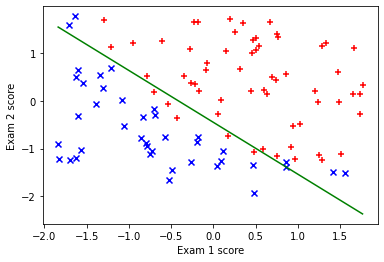

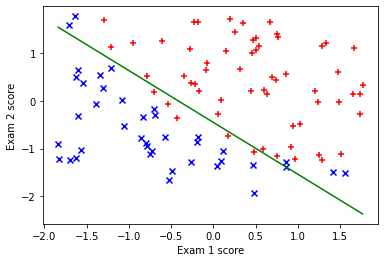

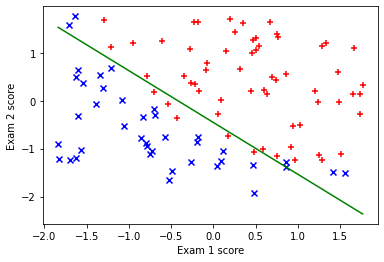

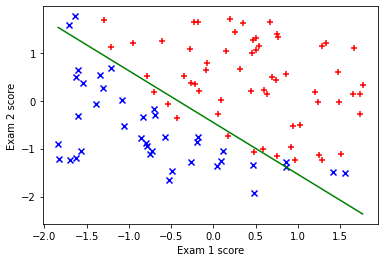

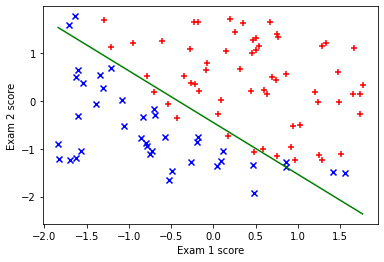

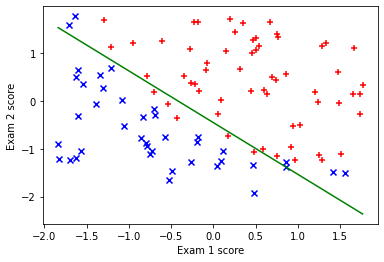

In [ ]:
theta,cost_function_values=gradientDescent(initial_theta,x,y,0.2,800)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

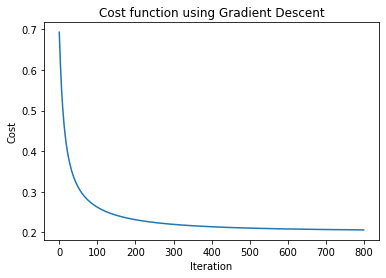

In [ ]:
plt.plot(cost_function_values)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost function using Gradient Descent")